In [272]:
from Precode2 import *
import numpy

data = np.load('AllSamples.npy')

In [273]:
k1,i_point1,k2,i_point2 = initial_S2('5780') # please replace 0111 with your last four digit of your ID

Strategy 2: k and initial points


In [274]:
print(k1)
print(i_point1)
print(k2)
print(i_point2)

4
[5.60001917 3.02332715]
6
[6.6384501  8.33574252]


In [275]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import sys

In [276]:
def get_distance(p1, arr):
    distance = 0
    for i in arr:
        distance += np.sum(np.square(p1-i))
    return distance

def get_k_centroids(data, centroid, k):
    centroid_arr = []
    centroid_arr.append(centroid)
    
    for i in range(k-2,-1,-1):
        distance = [get_distance(d,centroid_arr) for d in data]
        arg_max = np.argmax(distance)
        ki = data[arg_max]
        
        for j in centroid_arr:
            if ki[0] == j[0] and ki[1] == j[1]:
                ki = data[np.argsort(distance)[-2]]
        
        centroid_arr.append(ki)
    print(centroid_arr)    
    return centroid_arr

def do_k_mean_plus_plus_one_iteration(data, centroid):
    cluster = [0] * len(data)
    num_points_in_cluster = [0] * len(centroid)
    sum_points_in_cluster = np.zeros((len(centroid), 2))
    centroid_next = np.zeros((len(centroid), 2))
    loss = 0
        
    for i in range(len(data)):
            distance_arr = []

            for j in range(len(centroid)):
                distance = np.sum(np.square(data[i]-centroid_arr[j]))
                distance_arr.append(distance)  

            loss += np.min(distance_arr)
            c = np.argmin(distance_arr)
            cluster[i] = c   
            num_points_in_cluster[c] += 1
            sum_points_in_cluster[c] += data[i]
   
    #update centroids
    #print(sum_points_in_cluster)
    
    for k in range(len(sum_points_in_cluster)):
        centroid_next[k] = sum_points_in_cluster[k]/num_points_in_cluster[k]     

    return centroid_next, loss
            
def do_k_mean_plus_plus(data, centroid):
    loss_arr = []
    centroid_curr = centroid
    #print(centroid_curr.size)
    
    while(True):
        centroid_next = centroid_curr
        centroid_curr, loss = do_k_mean_one_iteration(data, centroid_curr)
        loss_arr.append(loss) 
        if(np.var(centroid_next) == np.var(centroid_curr)):
            break    
        
    return centroid_curr, loss_arr


[[5.600019172938185, 3.0233271509470305], array([9.26998864, 9.62492869]), array([ 3.85212146, -1.08715226]), array([2.95297924, 9.65073899])]
[[6.78374609 2.85019999]
 [7.17928621 8.0520791 ]
 [2.85235149 2.28186483]
 [3.34264769 6.92602803]]
[1969.634847557019, 1116.0575704401888, 844.3371714877886, 818.1215935871373, 810.6410858673139, 805.8935545696677, 805.328468495342, 805.1166457472608]


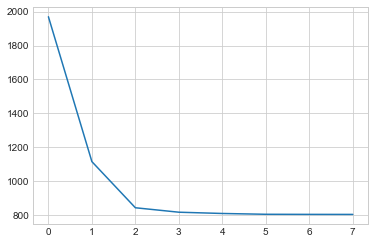

In [278]:
starting_centroid = get_k_centroids(data, i_point1.tolist(), k1)
centroid, loss_arr = do_k_mean_plus_plus(data, starting_centroid)
print(centroid)
print(loss_arr)
plt.plot(range(len(loss_arr)), loss_arr)

[array([6.6384501 , 8.33574252]), array([ 3.85212146, -1.08715226]), array([9.26998864, 9.62492869]), array([ 3.04101702, -0.36138487]), array([2.95297924, 9.65073899]), array([ 3.66118224, -0.63372377])]
[[5.46427736 6.83771354]
 [3.14506148 0.90770655]
 [7.75648325 8.55668928]
 [3.49556658 3.56611232]
 [2.56333815 6.9782248 ]
 [7.41419243 2.32169114]]
[3201.7813582636836, 668.713373471987, 535.2327641276428, 500.80523960489677, 479.9393320466872, 476.7158522819938, 476.118751676353]


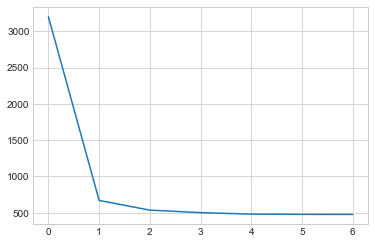

In [279]:
starting_centroid2 = get_k_centroids(data, i_point2, k2)
centroid2, loss_arr2 = do_k_mean_plus_plus(data, starting_centroid2)
print(centroid2)
print(loss_arr2)
plt.plot(range(len(loss_arr2)), loss_arr2)